# ASTR 596: FDS Homework 6+7: Gaussian Processes (200 pts)

### This is a double HW set so you get extra time - until reading day (May 4th, 2023) at noon to do it. 
### After that, it's finals time. 


# P1. Gaussian Processes

### Last HW, you worked on finding periodic planet signals in the light curve of Kepler-90, a star that is photometrically stable. The periodogram worked nicely because 

### a) we cleaned the light curve to squelch red noise
### b) the signals really were periodic and we could implictly make a strong assumption about the covariance between points.

### Life gets harder when the star itself has quasi-periodic variations because it has a magnetic field and is rotating (ruh oh...) 

In [1]:
#%matplotlib notebook
#%pylab

from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import sklearn
import sklearn.ensemble

In [2]:
tab = Table.read('KIC2157356.txt',format='ascii')
tab['quarter'] = tab['quarter'].astype('int')
tab

time,flux,error,quarter
float64,float64,float64,int64
539.4710179205795,5221.16455078125,4.891251087188721,6
539.4914521464307,5216.07958984375,4.892819404602051,6
539.5118864718097,5225.43359375,4.891888618469238,6
539.5323205971945,5233.111328125,4.892074108123779,6
539.5527548221144,5221.17333984375,4.891964435577393,6
539.573189147035,5220.09521484375,4.891523361206055,6
...,...,...,...
905.8044143491425,5862.43798828125,4.119598388671875,9
905.824848745775,5863.95458984375,4.118742942810059,9


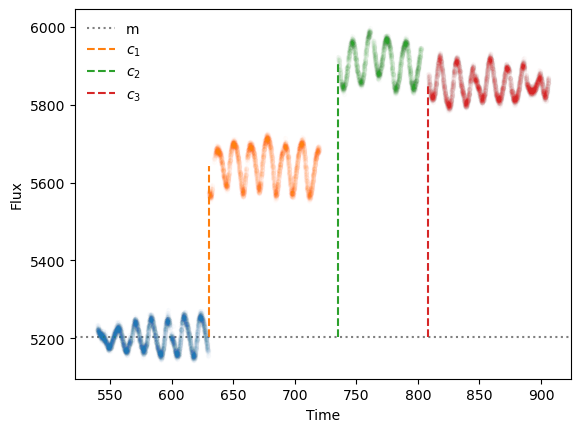

In [3]:
qs = sorted(np.unique(tab['quarter']))
plt.figure()
means = []
cycle_map = {}
for i, q in enumerate(qs):
    ind = tab['quarter']==q
    t = tab[ind]
    plt.errorbar(t['time'],t['flux'], yerr=t['error'], marker='.', linestyle='None', alpha=0.01)
    meanflux = np.mean(t['flux'])
    cycle_map[q] = ind
    means.append(meanflux)
    if i == 0:
        plt.axhline(meanflux, label='m', color='grey', ls=":")
    else:

        vmin = means[0]
        vmax = meanflux

        plt.plot((t['time'][0], t['time'][0]), (vmin, vmax), label=rf'$c_{i}$', color=f'C{i}', ls='--') 
    
plt.xlabel('Time')
plt.ylabel('Flux')
plt.legend(frameon=False);


### As you can see there is some kind of periodic singal, but it's not perfectly regular. There is also the usual offsets between Kepler photometry in different cycles.

### You'll need four parameters to describe constants ($m, c_1, c_2, c_3$) to renormalize the flux to the first cycle, illustrated in the figure above. 
### $m$ specifies the mean of the Gaussian process, while $c_1, c_2, c_3$ are nuisance parameters. 

### You know how to implement a model with one common zeropoint and multiple offsets - this was what you did on your midterm.


### You'll also need some model to describe the quasi-periodic oscillations. There's no good way to write down a model in real for these in real space because stellar magnetic fields are incredibly complicated. 

### Instead we'll write down a model for the covariance between the observations and use a Gaussian process to model the star. You can model quasi-periodic correlation structure as something periodic + something that varies the periodicity smoothly:

## $$k(t_i, t_j) = A\cdot \exp\left(-\Gamma_1\cdot \sin^2\left(\frac{\pi}{P}|t_i - t_j|\right) -  \frac{|t_i-t_j|^2}{\lambda}) \right) $$

### This is another 4 parameters, ($A, \Gamma_1, P, \lambda$) parameters for a total of 8: ($m, c_1, c_2, c_3, A, \Gamma_1, P, \lambda$)


<hr>

### Q1: To implement the GP correlations, use the `george` package to construct this quasi-periodic kernel
https://george.readthedocs.io/en/latest/user/kernels/


### In particular, you should be able to combine `ExpSine2Kernel` and `ExpSquaredKernel` to get a model for the quasi-periodic oscillations. (20 pts)

In [4]:
print('dropping hw6 see below for hw7 work')

dropping hw6 see below for hw7 work


### Q2: To implement the full model, read how to use `george`'s modeling protocol: (20 pts)
https://george.readthedocs.io/en/latest/tutorials/model/

In [5]:
print('dropping hw6 see below for hw7 work')

dropping hw6 see below for hw7 work


### Q3: With your model and likelihood constructured, write down priors on the parameters (you should be able to estimate from the plots) (20 pts)

In [6]:
print('dropping hw6 see below for hw7 work')

dropping hw6 see below for hw7 work


### Q4: Use `emcee` to optimize the model parameters and hyper-parameters, **using only every 10th sample in time**
### (Don't go overboard with the number of walkers or steps) (20 pts)
https://george.readthedocs.io/en/latest/tutorials/hyper/ may help 

In [7]:
print('dropping hw6 see below for hw7 work')

dropping hw6 see below for hw7 work


### Q5: Plot your posterior model over the data after correcting for the offsets, showing the points you used to condition the GP in red, and the remaining data in black.  (20 pts)

In [8]:
print('dropping hw6 see below for hw7 work')

dropping hw6 see below for hw7 work


# P2. Random Forests

For this work, we'll use the datasets produced by [Dey et al. (2022)](https://ui.adsabs.harvard.edu/abs/2022MNRAS.515.5285D/abstract), who trained a deep capsule network on postage stamps of SDSS galaxies to predict photometric redshifts. 

We're not going to use a deep capsule network on postage stamps, but we can use tabular data. This won't be as performant, but it's still instructive to see how well we can do with a simple random forest. Dey et al. have done an excellent job making their data available - http://d-scholarship.pitt.edu/42023/ (all of it)

You will need the [training set](http://d-scholarship.pitt.edu/42023/9/cat_train.csv) and the [test set](http://d-scholarship.pitt.edu/42023/8/cat_test.csv).

I suggest reading through Sec. 2 of the paper to get some sense of what the data is. Importantly, the data includes columns for photometric redshift already. You can't use these to train your random forest (duh.). I've limited the number of columns you can use to a set defined below. If you use more than these (e.g. the GalaxyZoo parameters) you might get better performance at the cost of a smaller training sample because you've also got to filter missing data. 

In [11]:
train_cols = ['dered_petro_u', 'dered_petro_g', 'dered_petro_r', 'dered_petro_i', 'dered_petro_z',\
       'petroMagErr_u', 'petroMagErr_g', 'petroMagErr_r', 'petroMagErr_i', 'petroMagErr_z',\
       'v_disp', 'sersicN_r', 'petroR90_r']
#pred_cols  = ['bestObjID', 'z', 'zErr', 'zphot', 'dzphot']
# removing best object ID since that's just the name
pred_cols  = ['z', 'zErr', 'zphot', 'dzphot']

### Q6. Pre-process the data

All ML work involves some amount of cleaning and pre-processing the data.
Filter data that have `zphot_reliable` == `True`, and have redshifts and photo-zs >= 0. 
Next filter any entries in the `train_cols` that have any value that is > 5 $\times$ the nomrally-scaled Median Absolute Deviation (as described in Sec 2.3) (`scipy.stats.median_abs_deviation` is your friend). 
Your pre-processed training data should have 357397 entries.
Make a hexbin plot of `zphot` vs `z` for the training data (to avoid plotting that many points) but replicate Fig. 3 in Dey et al. 
(35 pts)

        imageID            specObjID            bestObjID   class  \
0        604197  3109758158738843648  1237668333638516913  GALAXY   
1        410863  1559448938690406400  1237662664284438746  GALAXY   
2        352194  1888165532671174656  1237662499464675448  GALAXY   
3        391105  1109072471920764928  1237663543139959665  GALAXY   
4         33174   507800681206278144  1237651249878597774  GALAXY   
...         ...                  ...                  ...     ...   
413215   163794   933472216362805248  1237657606427115859  GALAXY   
413216     2942   345812102876784640  1237648704593330407  GALAXY   
413217    10230   301908603076372480  1237648722828198080  GALAXY   
413218   301804  1937748846054500352  1237661949200302413  GALAXY   
413219   160515  1006650218101368832  1237657595688059046  GALAXY   

           subClass         z      zErr                objID  type  \
0               NaN  0.115187  0.000022  1237668333638516913     3   
1               NaN  0.130501  

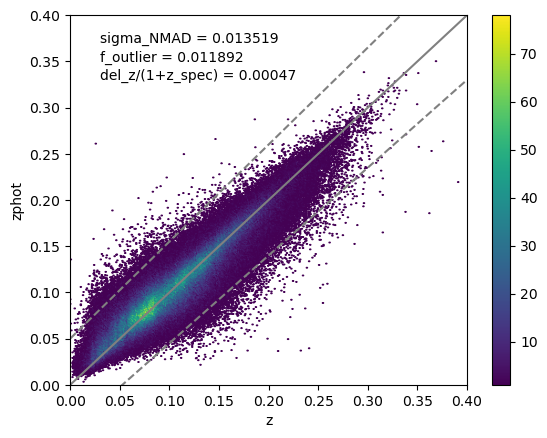

In [30]:
Train_data = pd.read_csv('cat_train.csv')
Test_data = pd.read_csv('cat_test.csv')
#print(Train_data['zphot_reliable'])
#print(Train_data)
Train_clean = Train_data.loc[(Train_data['zphot_reliable'] == True) & (Train_data['zphot'] >= 0) & (Train_data['z'] >= 0)]
#print(Train_clean)

for label in train_cols:
    #print(label)
    MAD = 5 * 1.4826*st.median_abs_deviation(Train_clean[label], nan_policy='omit')
    #MAD = 5 * st.median_abs_deviation(Train_clean[label], nan_policy='omit')
    #print(MAD)
    Train_clean = Train_clean.loc[abs(Train_clean[label] - np.mean(Train_clean[label]) )< MAD]

print(Train_clean)

z_frac = (Train_clean['zphot'] - Train_clean['z'])/(1 + Train_clean['z'])
sigma_NMAD = 1.4826* np.median(np.abs(z_frac - np.median(z_frac)))

outliers = len(z_frac[abs(z_frac)>0.05])/len(z_frac)
#print(outliers)

x_line = np.array([0, 0.4])
y_line_t = 1.05*x_line+0.05
y_line_b = 0.95*x_line-0.05

plt.hexbin(Train_clean['z'], Train_clean['zphot'], mincnt=1, gridsize=(350,350))
plt.xlabel('z')
plt.ylabel('zphot')
plt.xlim([0,0.4])
plt.ylim([0,0.4])

plt.colorbar()

plt.plot(x_line, x_line, color='grey')
plt.plot(x_line, y_line_t, color='grey', ls='--')
plt.plot(x_line, y_line_b, color='grey', ls='--')

plt.text(0.03, 0.37, 'sigma_NMAD = '+str(round(sigma_NMAD,6)))
plt.text(0.03, 0.35, 'f_outlier = '+str(round(outliers, 6)))
plt.text(0.03, 0.33, 'del_z/(1+z_spec) = '+str(round(np.mean(z_frac), 6)))

plt.show()
#plt.close_event()

### Q7. Train the forest(s)

Using `n_estimators` (i.e. number of trees) in (5, 20, 50, 200, 500), train a random forest. You can use all the cores your CPU has with `n_jobs=-1`. Limit the maximum number of features at each branch with `sqrt`. Use the inverse variance of the redshifts as your sample weights. Plot the `oob_score` vs the number of trees. For each of the forests you trained, make a plot of the feature importances. (35 pts)

In [13]:
from sklearn.ensemble import RandomForestRegressor

n_vals = [5, 20, 50, 200, 500]
oob_score_store = []
feat_imp = []
tree_store = []
for i in range(len(n_vals)):
    clf = RandomForestRegressor(n_estimators = n_vals[i], n_jobs=-1, max_features='sqrt', oob_score=True)
    clf.fit(Train_clean[train_cols], Train_clean[pred_cols], sample_weight=(1/Train_clean['zErr'])**2)
    tree_store.append(clf)
    print(clf.oob_score_)
    oob_score_store.append(clf.oob_score_)
    feat_imp.append(clf.feature_importances_)




/Users/josephweller/anaconda3/envs/fds/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:584: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


0.0039645008701302276


/Users/josephweller/anaconda3/envs/fds/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:584: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


0.7236939215034841
0.7519353458230996
0.7650639654700762
0.767421035520899


[0.0039645008701302276, 0.7236939215034841, 0.7519353458230996, 0.7650639654700762, 0.767421035520899]


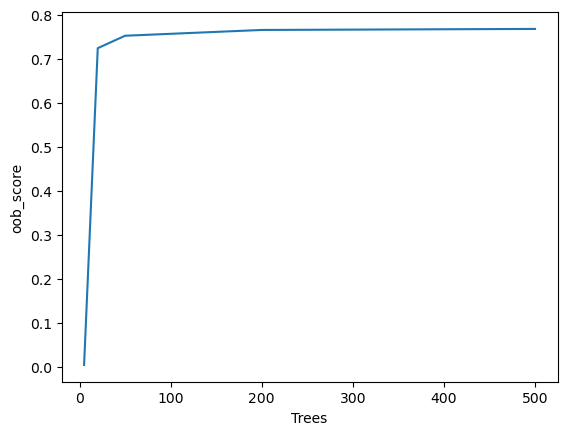

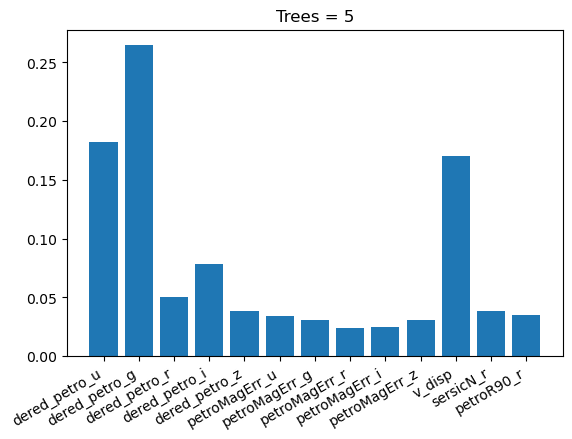

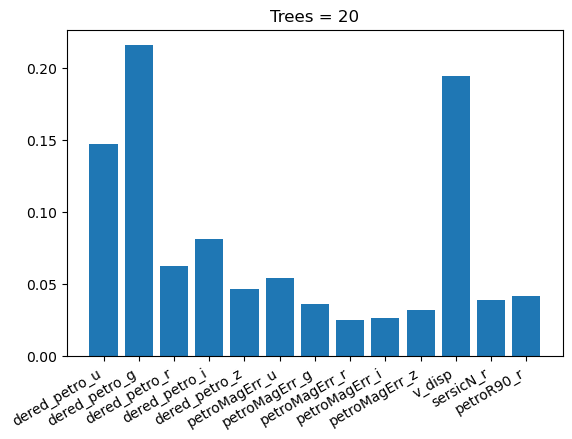

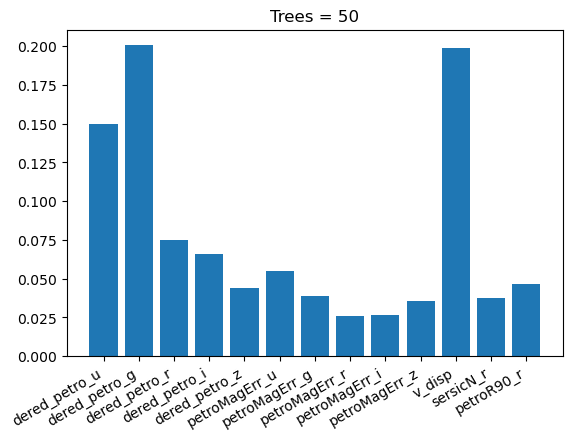

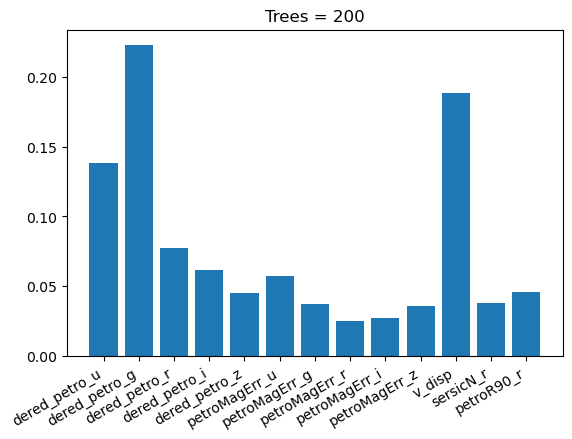

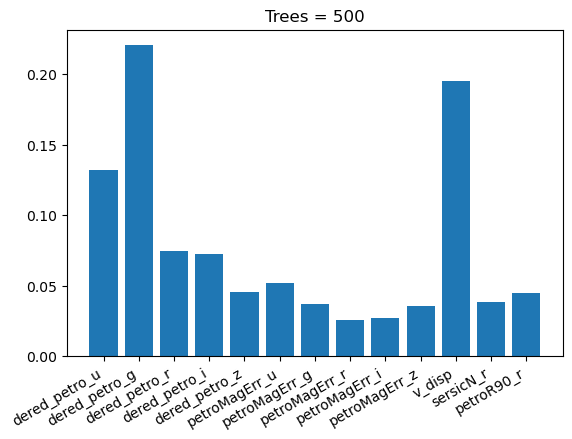

In [14]:
print(oob_score_store)
plt.plot(n_vals, oob_score_store)
plt.xlabel('Trees')
plt.ylabel('oob_score')
plt.show()
#plt.close()
for i in range(len(feat_imp)):
    n_features = len(train_cols)
    plt.bar(range(n_features), feat_imp[i])
    ax = plt.gca()
    ax.set_xticks(range(n_features))
    ax.set_xticklabels(list(train_cols))
    fig = plt.gcf()
    fig.autofmt_xdate()
    plt.title('Trees = '+str(n_vals[i]))
    plt.show()

### Q8. Test.

Pick your best performing forest from Q7. Load the test data (remember to apply any cuts you did to the training data). Use your random forest to predict the photo-z. Replicate Fig. 3 and Fig. 4 with your photo-z prediction *and* the photo-z prediction from SDSS included in the file. (30 pts, 10 pts for prediction, 10 for the two figures)

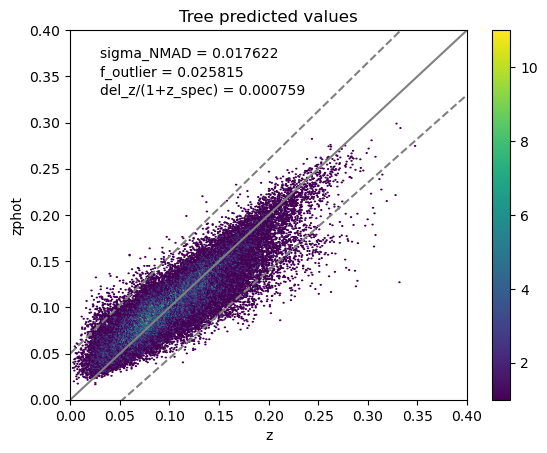

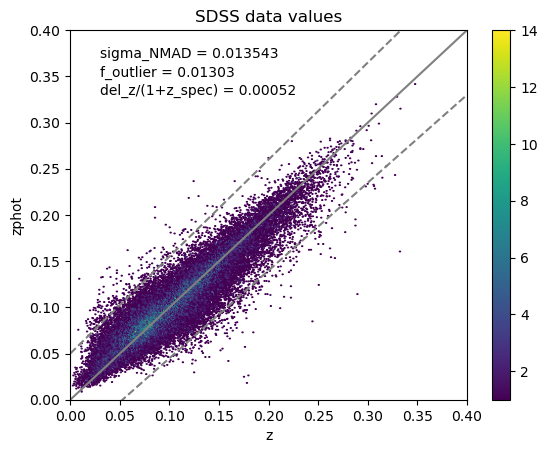

In [34]:
# 500 trees gave the highest oob score

# Clean Test data
Test_clean = Test_data.loc[(Test_data['zphot_reliable'] == True) & (Test_data['zphot'] >= 0) & (Test_data['z'] >= 0)]
for label in train_cols:
    #print(label)
    MAD = 5 * 1.4826*st.median_abs_deviation(Test_clean[label], nan_policy='omit')
    #print(MAD)
    Test_clean = Test_clean.loc[abs(Test_clean[label] - np.mean(Test_clean[label]) )< MAD]
    
clf_best = tree_store[4]
y_predict = clf_best.predict(Test_clean[train_cols])
#print(y_predict)

# Figure 3
# y_predict[:,2] is the photo-z

z_frac_pred = (y_predict[:,2] - Test_clean['z'])/(1 + Test_clean['z'])
sigma_NMAD_pred = 1.4826* np.median(np.abs(z_frac_pred - np.median(z_frac_pred)))

outliers_pred = len(z_frac[abs(z_frac_pred)>0.05])/len(z_frac_pred)

#plt.hexbin(y_predict[:,0], y_predict[:,2], mincnt=1, gridsize=(350,350))
plt.hexbin(Test_clean['z'], y_predict[:,2], mincnt=1, gridsize=(350,350))
plt.xlabel('z')
plt.ylabel('zphot')
plt.title('Tree predicted values')
plt.xlim([0,0.4])
plt.ylim([0,0.4])
plt.colorbar()

plt.plot(x_line, x_line, color='grey')
plt.plot(x_line, y_line_t, color='grey', ls='--')
plt.plot(x_line, y_line_b, color='grey', ls='--')

plt.text(0.03, 0.37, 'sigma_NMAD = '+str(round(sigma_NMAD_pred,6)))
plt.text(0.03, 0.35, 'f_outlier = '+str(round(outliers_pred, 6)))
plt.text(0.03, 0.33, 'del_z/(1+z_spec) = '+str(round(np.mean(z_frac_pred), 6)))

plt.show()

z_frac = (Test_clean['zphot'] - Test_clean['z'])/(1 + Test_clean['z'])
sigma_NMAD = 1.4826* np.median(np.abs(z_frac - np.median(z_frac)))

outliers = len(z_frac[abs(z_frac)>0.05])/len(z_frac)

plt.hexbin(Test_clean['z'], Test_clean['zphot'], mincnt=1, gridsize=(350,350))
plt.xlabel('z')
plt.ylabel('zphot')
plt.title('SDSS data values')
plt.xlim([0,0.4])
plt.ylim([0,0.4])
plt.colorbar()

plt.plot(x_line, x_line, color='grey')
plt.plot(x_line, y_line_t, color='grey', ls='--')
plt.plot(x_line, y_line_b, color='grey', ls='--')

plt.text(0.03, 0.37, 'sigma_NMAD = '+str(round(sigma_NMAD,6)))
plt.text(0.03, 0.35, 'f_outlier = '+str(round(outliers, 6)))
plt.text(0.03, 0.33, 'del_z/(1+z_spec) = '+str(round(np.mean(z_frac), 6)))

plt.show()



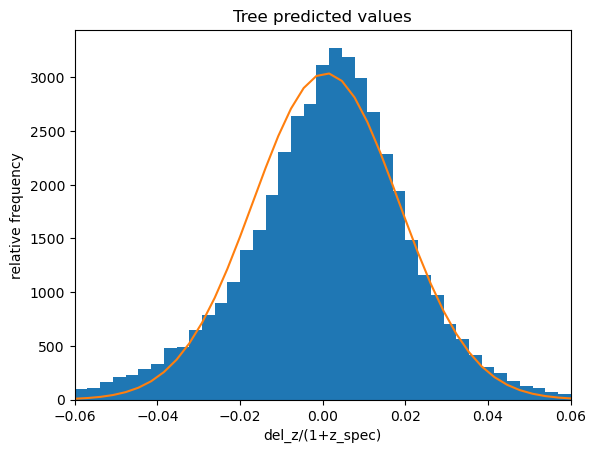

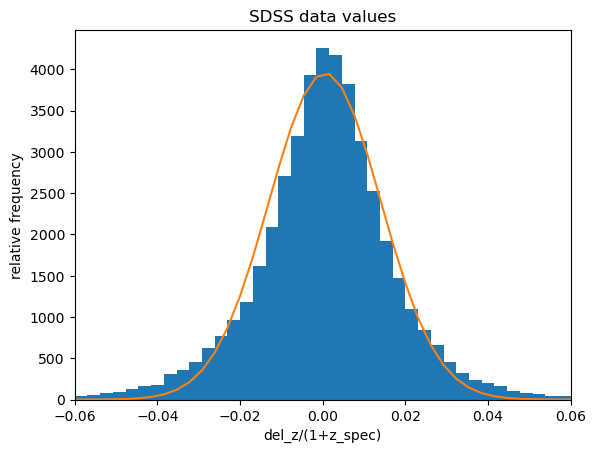

In [44]:
# Figure 4

#Norm_dist_data = Test_clean['zErr']/(1+Test_clean['z'])
#Norm_dist_predict = y_predict[:,2]/(1+y_predict[:,1])
Norm_dist_data = (Test_clean['zphot']-Test_clean['z'])/(1+Test_clean['z'])
Norm_dist_predict =(y_predict[:,2]-Test_clean['z'])/(1+Test_clean['z'])

bins = np.linspace(-0.06, 0.06, 40)
scale = (0.12/40)*len(Norm_dist_predict[abs(Norm_dist_predict)<0.6])
#print(scale)

plt.hist(Norm_dist_predict, bins=bins)
plt.title('Tree predicted values')
plt.xlabel('del_z/(1+z_spec)')
plt.ylabel('relative frequency')
plt.xlim([-0.06, 0.06])

xvals = np.linspace(-0.06, 0.06, 40)
yvals = scale*st.norm.pdf(xvals, np.mean(Norm_dist_predict), sigma_NMAD_pred)
plt.plot(xvals,yvals)

plt.show()

scale = (0.12/40)*len(Norm_dist_data[abs(Norm_dist_data)<0.6])

plt.hist(Norm_dist_data, bins=bins)
plt.title('SDSS data values')
plt.xlabel('del_z/(1+z_spec)')
plt.ylabel('relative frequency')
plt.xlim([-0.06, 0.06])

yvals = scale*st.norm.pdf(xvals, np.mean(Norm_dist_data), sigma_NMAD)
plt.plot(xvals,yvals)

plt.show()